In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
from sklearn.preprocessing import MinMaxScaler
Mm= MinMaxScaler()

In [8]:
temp = Mm.fit_transform(data)
tmp = pd.DataFrame(temp, columns = data.columns)
tmp.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [9]:
x = data.drop('Outcome', axis = 1)
y = data['Outcome']

In [49]:
from sklearn.model_selection import train_test_split as tts
train_x, test_x, train_y, test_y = tts(x, y, random_state=96, stratify = y)

In [76]:
from sklearn.neighbors import KNeighborsClassifier as KNN  
from sklearn.metrics import f1_score


In [59]:
clf = KNN(n_neighbors =10)
clf.fit(train_x, train_y)

temp = clf.predict(train_x)
score=f1_score(temp, train_y)
print("The Score is ", score)


The Score is  0.6666666666666667


The Score is  0.5272727272727272


In [71]:
from sklearn.metrics import accuracy_score

In [95]:
def F1score(k):
    
    train_ls = []
    test_ls = []
    
    for i in k:
        
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        temp=clf.predict(train_x)
        score=f1_score(temp, train_y.round())
        train_ls.append(score)
    
    
        tmp=clf.predict(test_x)
        score1=f1_score(tmp, test_y.round())
        test_ls.append(score1)
    
    return train_ls , test_ls
    
    

In [96]:
k = range(1,150)

In [97]:
train, test = F1score(k)

In [100]:
score = pd.DataFrame({'train score': train , 'test score' : test})
score.head()

,train score,test score
0,1.000000,0.511278
1,0.681967,0.400000
2,0.781003,0.539683
3,0.654321,0.428571
4,0.720627,0.555556


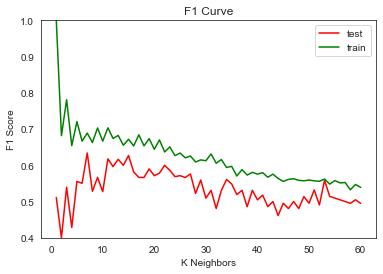

In [107]:
plt.plot(k[0:60], test[0:60], color = 'red' , label = 'test')
plt.plot(k[0:60], train[0:60], color = 'green', label = 'train')
plt.xlabel('K Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Curve')
plt.ylim(0.4,1)
plt.legend()

In [114]:
clf = KNN(n_neighbors =18)
clf.fit(train_x, train_y)

temp = clf.predict(train_x)
score=f1_score(temp, train_y)
print("The Train Score is ", score)

temp = clf.predict(test_x)
score=f1_score(temp, test_y)
print("The Test Score is ", score)


The Train Score is  0.6536312849162011
The Test Score is  0.5663716814159292
